##USML LAB 2018 Stocks Dataset


##PCA - principle component analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
# Load the CSV file
file_path = '/content/drive/MyDrive/Dataset/2018_Financial_Data.csv'
stocks_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Original Dataset Info:")
print(stocks_data.info())

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB
None


In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = stocks_data.select_dtypes(include=['number']).columns
non_numeric_columns = stocks_data.columns.difference(numeric_columns)

In [ ]:
# Handle missing values in numeric columns (fill empty values with the mean)
imputer_numeric = SimpleImputer(strategy='mean')
stocks_data[numeric_columns] = imputer_numeric.fit_transform(stocks_data[numeric_columns])

In [ ]:
# Handle missing values in non-numeric columns (fill empty values with a specific value or use another strategy)
imputer_non_numeric = SimpleImputer(strategy='constant', fill_value='UNKNOWN')
stocks_data[non_numeric_columns] = imputer_non_numeric.fit_transform(stocks_data[non_numeric_columns])

In [ ]:
# Display information after handling missing values
print("\nDataset Info after Handling Missing Values:")
print(stocks_data.info())


Dataset Info after Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(223), object(2)
memory usage: 7.5+ MB
None


In [ ]:
# Encode non-numeric categorical variables (assuming there are non-numeric categorical columns)
label_encoder = LabelEncoder()

for column in non_numeric_columns:
    stocks_data_no_outliers_numeric[column] = label_encoder.fit_transform(stocks_data_no_outliers_numeric[column])

NameError: name 'stocks_data_no_outliers_numeric' is not defined

In [ ]:
# Display information after encoding non-numeric categorical variables
print("\nDataset Info after Encoding Non-Numeric Categorical Variables:")
print(stocks_data_no_outliers_numeric.info())


Dataset Info after Encoding Non-Numeric Categorical Variables:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 225 entries, Stocks Names to Class
dtypes: float64(223), int64(2)
memory usage: 0.0 bytes
None


In [ ]:
# Feature scaling (standardization) using StandardScaler (exclude non-numeric columns)
numeric_columns_no_outliers = stocks_data_no_outliers_numeric.select_dtypes(include=['number']).columns

In [ ]:
# Combine scaled numeric columns and non-numeric columns
stocks_data_scaled[non_numeric_columns] = stocks_data_no_outliers_numeric[non_numeric_columns]

# Display information after feature scaling
print("\nDataset Info after Feature Scaling:")
print(stocks_data_scaled.describe())


Dataset Info after Feature Scaling:
       Sector  Stocks Names
count     0.0           0.0
mean      NaN           NaN
std       NaN           NaN
min       NaN           NaN
25%       NaN           NaN
50%       NaN           NaN
75%       NaN           NaN
max       NaN           NaN


In [ ]:
# Save the preprocessed dataset to a new CSV file
preprocessed_file_path = '/content/preprocessed_stocks_dataset.csv'
stocks_data.to_csv(preprocessed_file_path, index=False)

print("\nPreprocessed Dataset saved to:", preprocessed_file_path)


Preprocessed Dataset saved to: /content/preprocessed_stocks_dataset.csv


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)


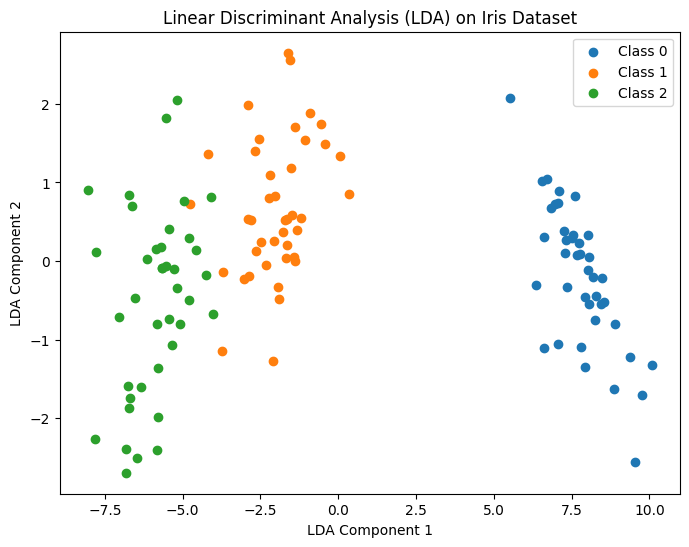

In [ ]:
# Visualize the LDA results
plt.figure(figsize=(8, 6))

for label in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=f'Class {label}')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.title('Linear Discriminant Analysis (LDA) on Iris Dataset')
plt.show()

In [ ]:

# Train a classifier on the LDA-transformed data
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

LogisticRegression()

In [ ]:

# Make predictions on the test set
y_pred = classifier.predict(X_test_lda)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 1.00
